<a href="https://colab.research.google.com/github/satyam1301/Profit-Prediction-Model/blob/main/profit_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#importing/reading the dataset
import pandas as pd
df = pd.read_csv("1000_Companies.csv")

In [8]:
#analyzing the null values
df.isnull().sum()

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Profit             0
dtype: int64

In [9]:
df.describe().style.background_gradient(cmap='CMRmap')

,R&D Spend,Administration,Marketing Spend,Profit
count,998.000000,1000.000000,997.000000,1000.000000
mean,81832.592385,122963.897612,226885.715566,119546.164656
std,46440.103030,12613.927535,90869.558039,42888.633848
min,542.050000,51283.140000,1903.930000,14681.400000
25%,43281.500000,116640.684850,151751.515600,85943.198543
50%,80140.000000,122421.612150,225043.676800,117641.466300
75%,124620.500000,129139.118000,309075.450300,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


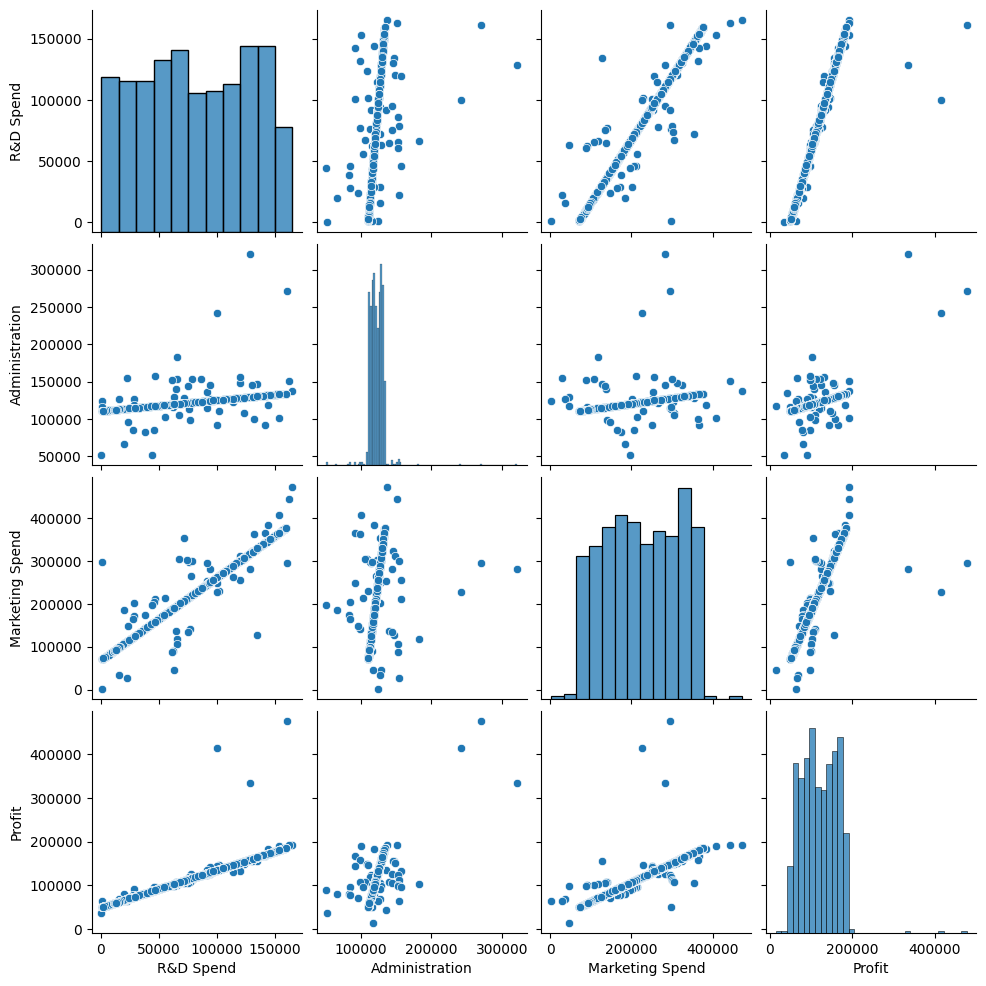

In [10]:
sns.pairplot(df)

In [11]:
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


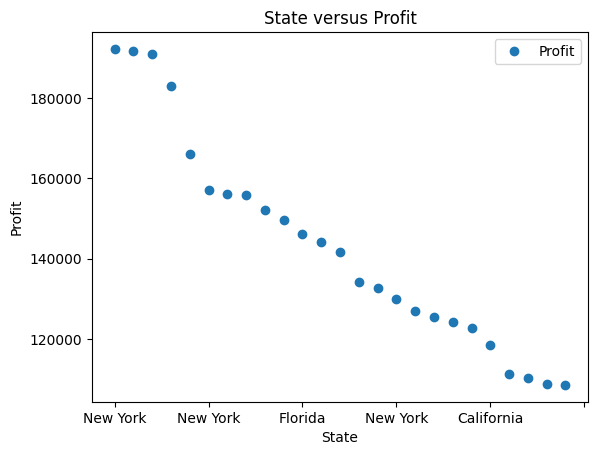

In [12]:
dff=df.head(25)
dff.plot(x="State", y="Profit",style='o')
plt.title("State versus Profit")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()

In [13]:
#removing the unwanted parameters
df1 = df.drop(['State'],axis='columns')
df1.head(10)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [14]:
#removing the null values
dataset = df1.dropna()
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [22]:
dataset.shape

(996, 4)

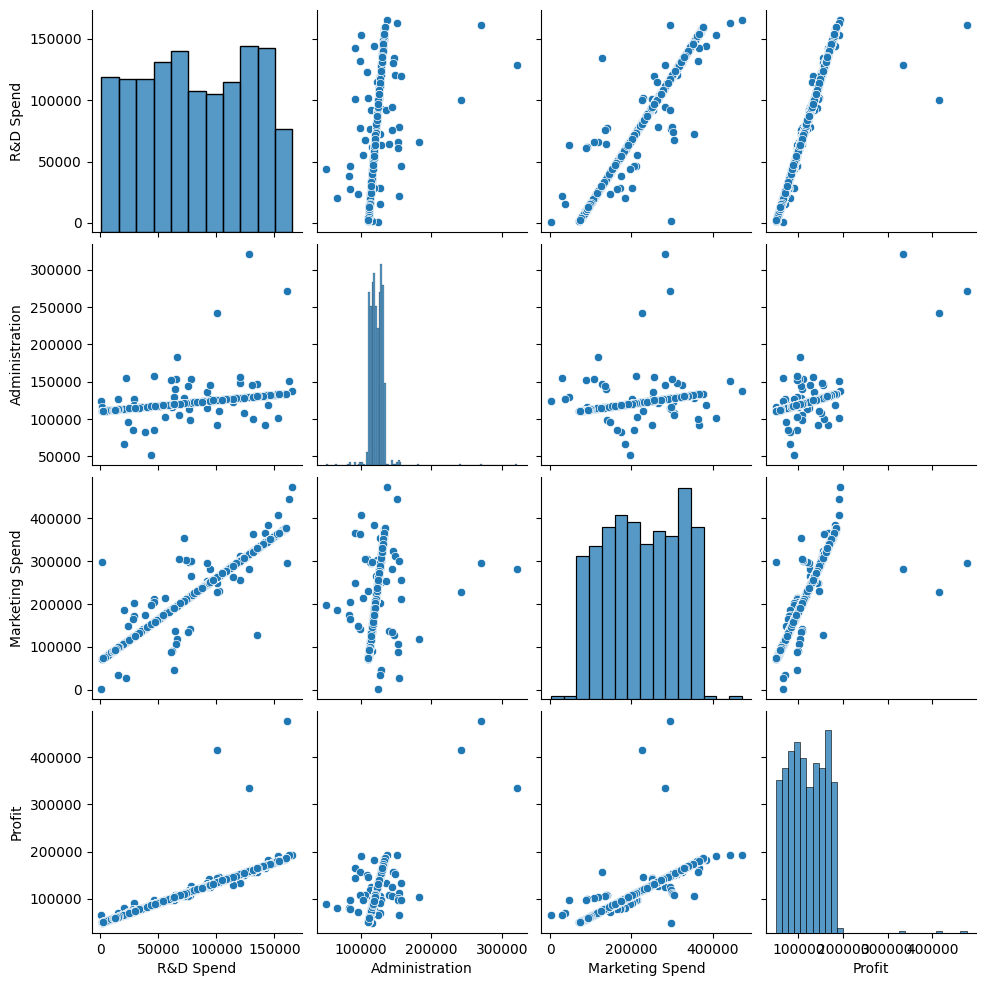

In [16]:
sns.pairplot(dataset)

In [17]:
X=dataset[['R&D Spend','Administration','Marketing Spend']]

In [18]:
X.shape

(996, 3)

In [19]:
Y=dataset['Profit']

In [21]:
Y.shape

(996,)

In [20]:
#removing the outliers
import numpy as np
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

clean_dataset(dataset)
dataset.head()

<ipython-input-20-6ed4f8df405f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
<ipython-input-20-6ed4f8df405f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [23]:
from sklearn.model_selection import train_test_split
#here 30% data is used for testing and 70% for training the model
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=29)

In [24]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((697, 3), (299, 3), (697,), (299,))

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model_lr=LinearRegression()
model_lr.fit(X_train,Y_train)

LinearRegression()

In [27]:
Y_predicted=model_lr.predict(X_test)

In [28]:
data=pd.DataFrame({"Actual": Y_test,"Predicted": Y_predicted})
data

,Actual,Predicted
495,174050.75270,174685.851776
201,163549.80310,164061.926877
205,94297.52743,93998.646394
828,125667.96090,125736.455120
438,102740.48900,102540.482532
...,...,...
916,103813.47900,103626.038144
613,138213.22960,138428.639989
227,141814.06780,142071.647084
404,125636.35210,125704.476203


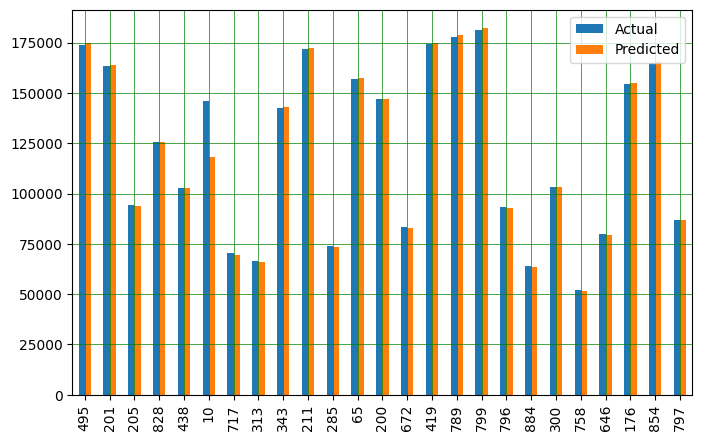

In [29]:
d2=data.head(25)
d2.plot(kind='bar',figsize=(8,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_percentage_error

In [31]:
mean_absolute_percentage_error(Y_test,Y_predicted)

0.02087971936523268

In [32]:
from sklearn.metrics import r2_score

r2Score = r2_score(Y_predicted, Y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 92.03076283301935


In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10,random_state=10) #n_estimators define the number of decision trees
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

In [34]:
y_p = regressor.predict(X_test)


In [35]:
d3=pd.DataFrame({"Actual": Y_test,"Predicted": y_p})
d3

,Actual,Predicted
495,174050.75270,174031.958250
201,163549.80310,163476.504940
205,94297.52743,94310.341799
828,125667.96090,125847.874660
438,102740.48900,102748.348520
...,...,...
916,103813.47900,103930.175220
613,138213.22960,138012.898340
227,141814.06780,141720.266580
404,125636.35210,125807.893820


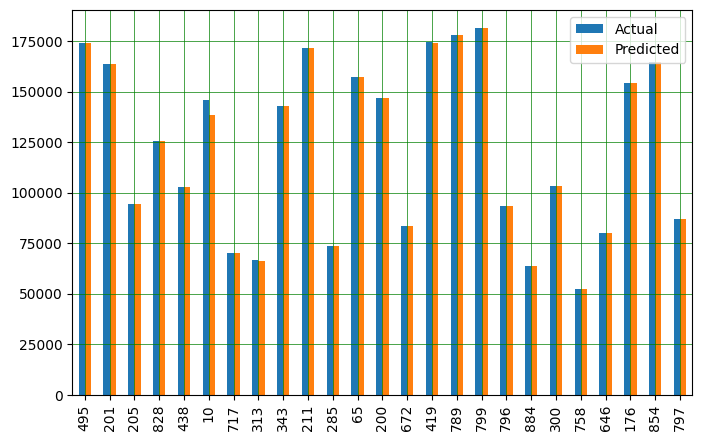

In [36]:
d4=d3.head(25)
d4.plot(kind='bar',figsize=(8,5))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [37]:
mean_absolute_percentage_error(Y_test, y_p)

0.003900033112945645

In [39]:
#find the accuracy
from sklearn.metrics import r2_score
r2_score(Y_test,y_p)

0.9899256323427182

In [38]:
my_pred=regressor.predict([['122107.34','92999.77','466168.42']])
print("Predicted Score=",format(my_pred[0]))

Predicted Score= 154815.53901999997


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The accuracy of random forest regression turns out to be 97% while in case of multiple linear regression ,it was 92%